3.1 Data Preparation

In [2]:
# Importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.shape

(100000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
# Checking the missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
# Checking the duplicate value
duplicate_value = df.duplicated().sum()
duplicate_value

3854

In [10]:
df.drop_duplicates(inplace=True)

df.shape

(96146, 9)

In [11]:
# Convert the categorical variables to numerical using LabelEncoder
label_encoder = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoder[column] = LabelEncoder()
    df[column] = label_encoder[column].fit_transform(df[column])

In [12]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [15]:
from sklearn.utils import shuffle
shuffle_data = shuffle(df, random_state=42)

In [17]:
shuffle_data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2547,0,5.0,0,0,0,15.14,4.5,90,0
34774,1,19.0,0,0,4,22.74,6.6,85,0
71084,0,52.0,0,0,4,24.27,7.5,220,1
50584,1,55.0,0,0,0,27.32,5.7,85,0
80788,0,22.0,0,0,4,28.78,4.5,200,0
46976,0,71.0,0,0,0,29.05,3.5,126,0
69385,1,62.0,0,0,3,27.32,3.5,158,0
57772,1,6.0,0,0,0,22.88,5.7,80,0
87690,0,62.0,0,0,0,20.19,6.5,85,0
35032,0,18.0,0,0,4,20.97,4.0,160,0


In [12]:
# Features Selection
features = df.columns[:-1] 
target = df.columns[-1]

In [13]:
# EDA
import seaborn as sns
import matplotlib.pyplot as plt

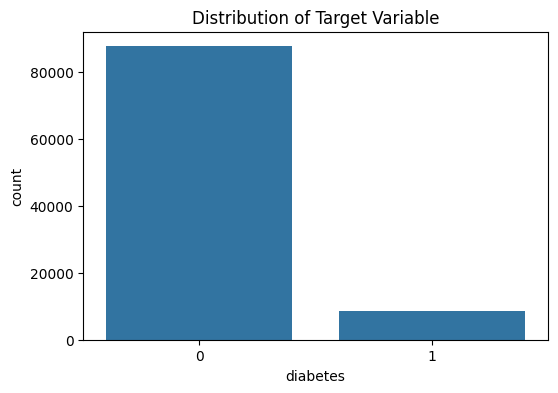

In [14]:
# Checking the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=target, data=df)
plt.title('Distribution of Target Variable')
plt.show()

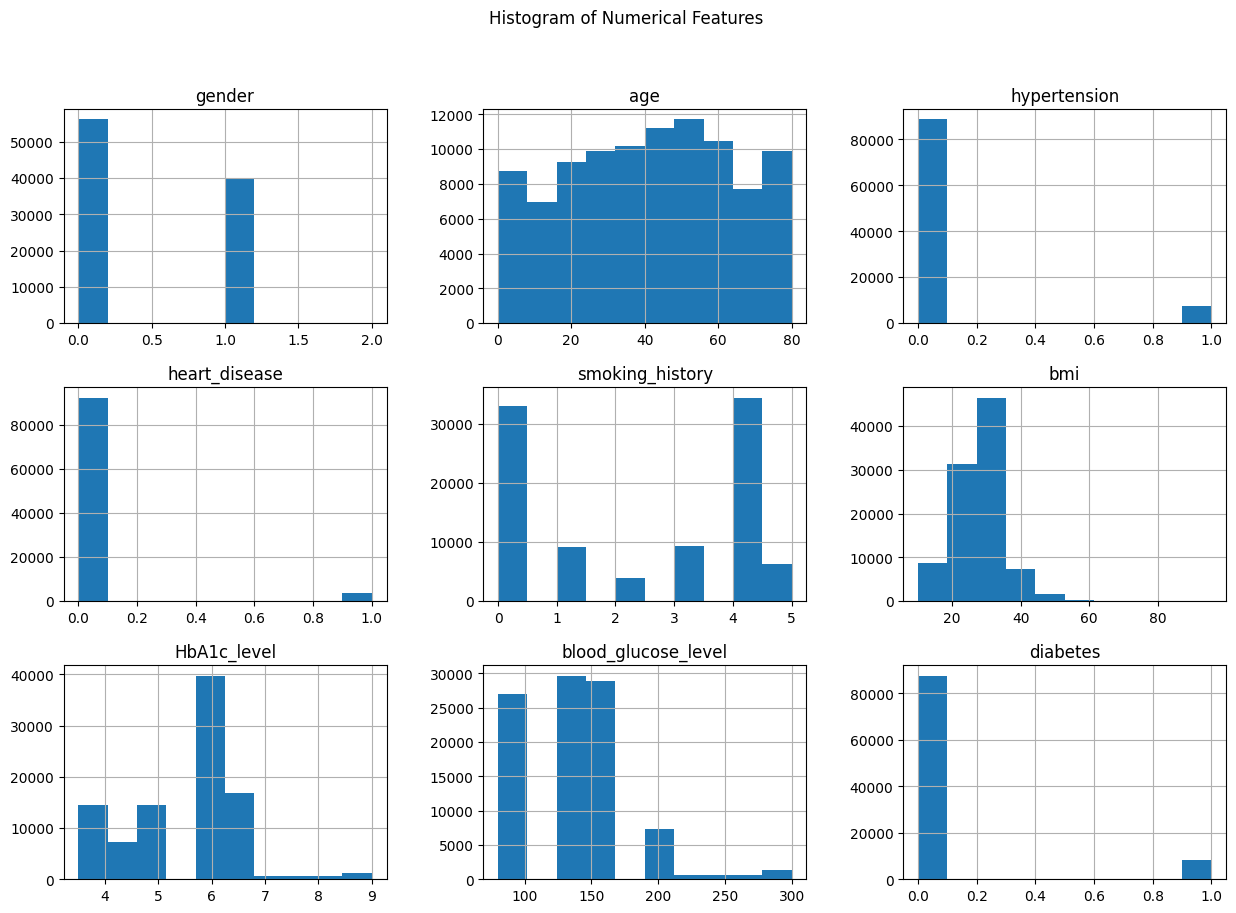

In [15]:
# Distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(figsize=(15, 10))
plt.suptitle('Histogram of Numerical Features')
plt.show()

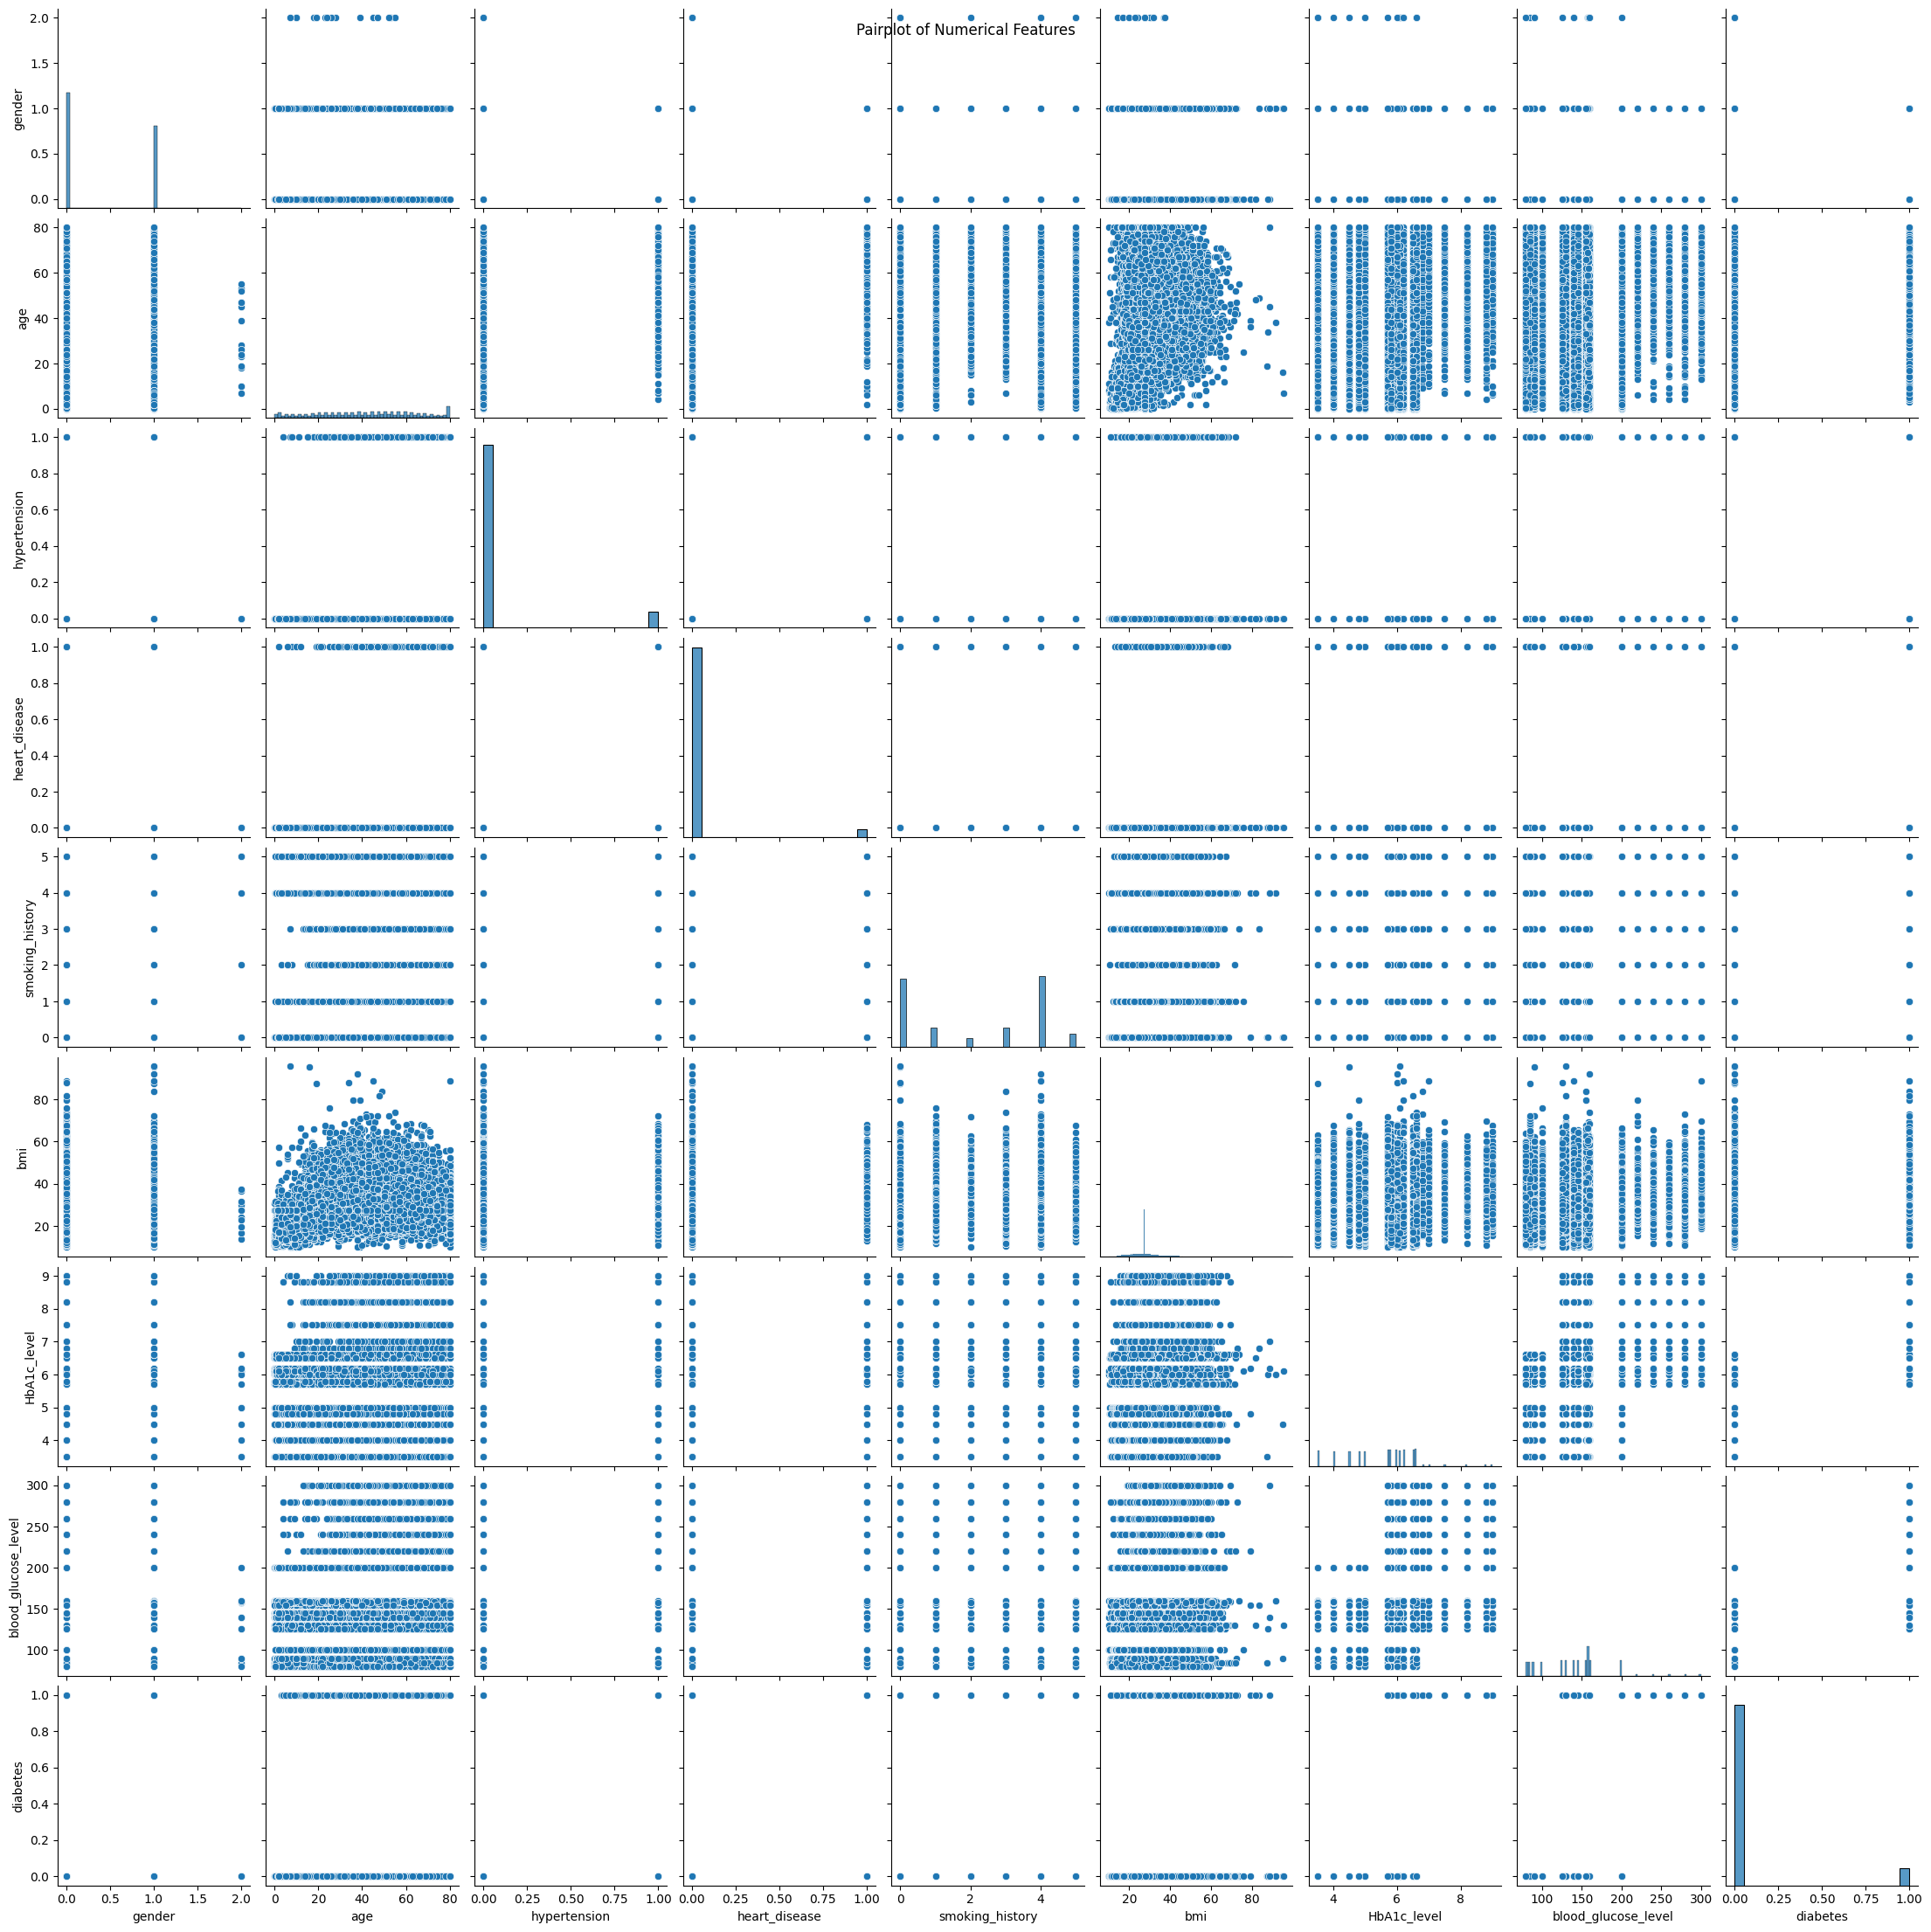

In [16]:
# Pairplot to see relationships between features
sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot of Numerical Features')
plt.show()

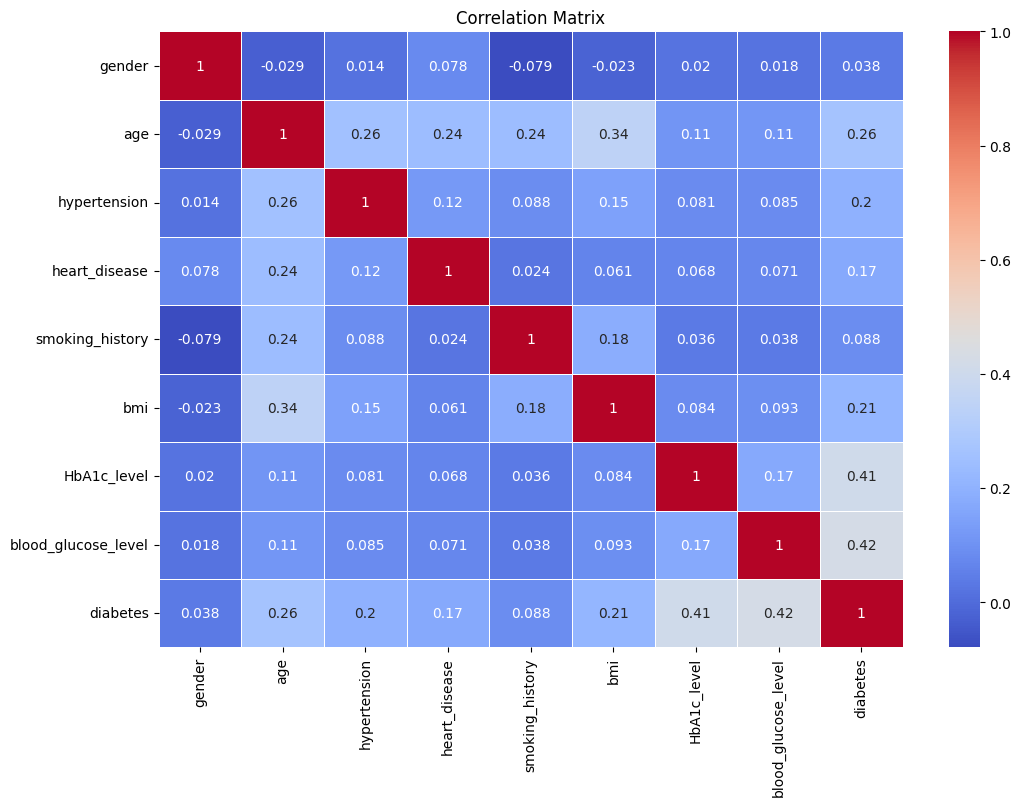

In [17]:
# Correlation matrix
plt.figure(figsize=(12,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

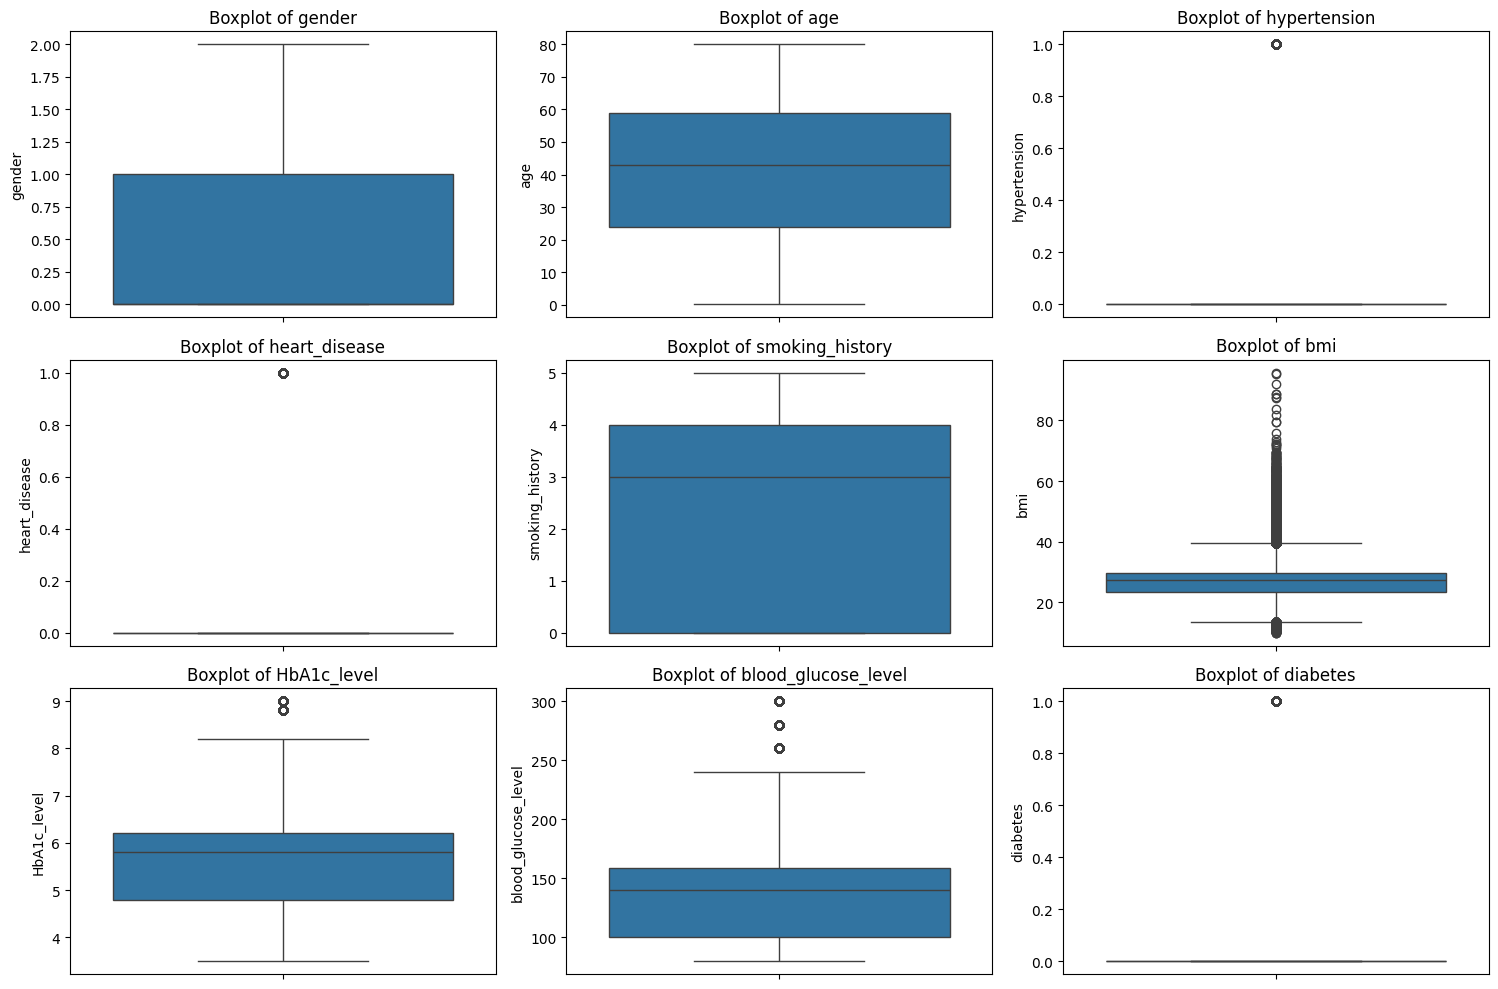

In [18]:
# Boxplots to check for outliners
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [19]:
# Data Preprocessing
X = df[features]
y = df[target]

In [20]:
# Standardize the feature columns
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76916, 8), (19230, 8), (76916,), (19230,))

In [23]:
# Initialize models
logistic_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [24]:
# Train the models 
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Test models
logistic_y_pred = logistic_model.predict(X_test)

In [29]:
knn_y_pred = knn_model.predict(X_test)

In [30]:
svm_y_pred = svm_model.predict(X_test)

In [31]:
rf_y_pred = rf_model.predict(X_test)

In [32]:
# Evaluate models
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{model_name} Performance:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print()

In [33]:
evaluate_model(y_test, logistic_y_pred, "Logistic Regression")

Logistic Regression Performance:
Accuracy: 0.9569
Precision: 0.8546
Recall: 0.6252
F1 Score: 0.7221



In [34]:
evaluate_model(y_test, knn_y_pred, "K-Nearest Neighbors")

K-Nearest Neighbors Performance:
Accuracy: 0.9584
Precision: 0.8828
Recall: 0.6171
F1 Score: 0.7264



In [35]:
evaluate_model(y_test, svm_y_pred, "Support Vector Machine")

Support Vector Machine Performance:
Accuracy: 0.9579
Precision: 0.9122
Recall: 0.5857
F1 Score: 0.7134



In [36]:
evaluate_model(y_test, rf_y_pred, "Random Forest Classifer")

Random Forest Classifer Performance:
Accuracy: 0.9685
Precision: 0.9429
Recall: 0.6903
F1 Score: 0.7970



In [37]:
# Underfitting vs. Overfitting
def compare_train_test_scores(model, X_train, y_train, X_test, y_test, model_name):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{model_name} Training vs. Testing Scores:")
    print(f"Training Score: {train_score:.4f}")
    print(f"Testing Score: {test_score:.4f}")
    print()

In [38]:
compare_train_test_scores(logistic_model, X_train, y_train, X_test, y_test, "Logistic Regression")
compare_train_test_scores(knn_model, X_train, y_train, X_test, y_test, "K-Nearest Neighbors")
compare_train_test_scores(svm_model, X_train, y_train, X_test, y_test, "Support Vector Machine")
compare_train_test_scores(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

Logistic Regression Training vs. Testing Scores:
Training Score: 0.9593
Testing Score: 0.9569

K-Nearest Neighbors Training vs. Testing Scores:
Training Score: 0.9690
Testing Score: 0.9584

Support Vector Machine Training vs. Testing Scores:
Training Score: 0.9599
Testing Score: 0.9579

Random Forest Training vs. Testing Scores:
Training Score: 0.9993
Testing Score: 0.9685

